In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install bnlp_toolkit

Note: you may need to restart the kernel to use updated packages.


In [3]:
train_df = pd.read_excel("/kaggle/input/bemoc-dataset/cleaned_BEmoC7k.xlsx")

In [4]:
train_df

,TEXT,classes
0,নাইমা কি করবেন আমরা জানি,sadness
1,ভাই সব আপনাদের খুব ভাল লাগছে,joy
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ...,anger
3,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,joy
4,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,disgust
...,...,...
6995,হে আল্লাহ আপনি আমাদের দেশের প্রতি সহায়ক হন ...,sadness
6996,ঈদ ছারাও যুদি বাংলাদেশ ঈদের খুশির অামেজ পান তব...,joy
6997,বছরের সবচেয়ে সেরা ভিডিও দেখেছি আমাদের দেশের স...,joy
6998,কিরে মিথ্যা কথা কস কেন গতদিন আমি আর আসিফ আসছি...,anger


In [5]:
train_df.dropna(inplace=True)

In [6]:
longest_string = max(train_df["TEXT"], key=len)
print(len(longest_string))

1093


In [7]:
from bnlp import CleanText

clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=False,
   remove_email=False,
   remove_emoji=False,
   remove_number=False,
   remove_digits=False,
   remove_punct=False,
   replace_with_url="<URL>",
   replace_with_email="<EMAIL>",
   replace_with_number="<NUMBER>",
   replace_with_digit="<DIGIT>",
   replace_with_punct = "<PUNC>"
)

train_df['TEXT'] = train_df['TEXT'].apply(clean_text)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
longest_string = max(train_df["TEXT"], key=len)
print(len(longest_string))

1120


In [9]:
train_df["classes"].value_counts()

classes
joy         1524
disgust     1356
sadness     1327
anger       1052
fear         962
surprise     779
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2,stratify=train_df['classes'],random_state=42)


In [11]:
X_train  =  train_df['TEXT'].values.tolist()
y_train = train_df['classes'].tolist()

In [12]:
X_test =  test_df['TEXT'].values.tolist()
y_test = test_df['classes'].tolist()

In [13]:
!pip install imbalanced-learn

In [14]:
from collections import Counter

# Counter(y_train)

In [15]:
print(Counter(X_train))
print(Counter(y_train))

Counter({'বেসামরিক বিমান পরিবহন ও পর্যটন প্রতিমন্ত্রী মাহবুব আলী বলেছেন    অর্থ বছরে বিমান বাংলাদেশ এয়ারলাইন্সের লাভ হয়েছে  কোটি টাকা  বুধবার   জুলাই  সচিবালয়ে বিমান পরিবহনের সম্মেলন কক্ষে এ তথ্য জানান তিনি ': 4, 'কিছুক্ষণ আগে লক্ষ্য করলাম  কিছু মানুষ বাঙলাদেশের পাসপোর্টে লেখা             লেখাটি শেয়ার করছে  অবাক হলাম  এই সব মানুষই দিন আগে মানবতা নিয়ে উচ্চবাচ্য করছিলো ': 3, 'ওদের কিছু করতে পারবে না কারন তাদের কথায় থানা পুলিশ উঠে আর বসে  আর এমপি মন্ত্রি তো এদের হাতের ময়লা  আর এদের খমতায় সাধারন জনগণের জায়গা জমি আর টাক্কা পয়সা হাতিয়ে নিয়ে আজ কয়েশো কুটি টাকার মালিক  অনেক লোককে পথের ফকির করে দিয়েছে  দেখি কি বিচার করে নাকি টাকা পয়সা নিয়ে ছেড়ে দেয় ': 3, 'স্বাস্থ্য অধিদপ্তরের মহাপরিচালক আবুল কালাম আজাদ প্রথম আলোকে বলেন  ডেঙ্গু মোকাবিলায় সরকারি হাসপাতালগুলোকে বিশেষ বরাদ্দ দেওয়া হয়েছে  সদর হাসপাতালে  লাখ এবং উপজেলা হাসপাতালকে  লাখ টাকা দেওয়া হয়েছে  হাসপাতালগুলো বরাদ্দের টাকা দিয়ে কিট সংগ্রহ করতে পারবে ': 2, 'তারা ঠিকই ব্যাডমিন্টন খেলে  অথচ মানুষের প্রজেক্ট আইডিয়া দেখার টা

In [17]:
np.array(X_train).shape

(5600,)

In [18]:
X_train = np.array(X_train).reshape(-1, 1)

In [19]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [21]:
X_train = np.array(X_train).reshape(7314,)

In [22]:
print(Counter(X_train))
print(Counter(y_train))

Counter({'চুরি করছে তো করছে  ক্রেডিট দিছে আরেকজনকে  এইডাই সবচেয়ে বড়  মনে হইল আমার কাছে ': 8, 'আজ সকালে সাধন আচার্য্যকে ফোন করলেন  অনেক দিন পর  নিগার ডিসপ্লেতে পরিচিত নামটা দেখেই ভীষণ অবাক হয়েছে  ': 6, 'রাতে নোটিফিকেশন আসছে  ক্লিক করলাম বাট লেখা আসছে   হলো এটা ': 6, 'কতক্ষণ ঘুমিয়ে ছিলেন কে জানে  হঠাৎ একটা অদ্ভুত আওয়াজ আর অস্বস্তির মধ্যে তার ঘুমটা গেল ভেঙে  গভীর ঘুমে আচ্ছন্ন মানুষের হঠাৎ ঘুম ভেঙে গেলে সামান্য সময় লাগে প্রকৃতিস্থ হতে ': 6, 'চট্টগ্রাম বিশ্ববিদ্যালয়ে স্নাতক প্রথম বর্ষের বিভিন্ন বিভাগে ভর্তি হতে আবেদন করেছেন  লাখ  হাজার  জন শিক্ষার্থী  এর আগে এত–সংখ্যক আবেদন আর জমা পড়েনি  আজ বুধবার প্রথম আলোকে বিশ্ববিদ্যালয়ের আইসিটি সেলের পরিচালক মো  হানিফ সিদ্দিকী বলেন  গতবারের মতো এবারও আসন রয়েছে  হাজার টি  ফলে প্রতি আসনের জন্য লড়বেন  জন': 6, 'এতো তাড়াতাড়ি ভিডিও দেখতে পাবো ভাবতেই পারিনি      আশা করি তোমাদের    এর অনেক উন্নতি হবে   ': 6, 'দিনক্ষণের কোন হিসেব নেই মোজাম্মেল ভাইয়ের  সম্পর্কের পরেও পরপর তিন বছর ঊষা আপুর জন্মদিনের দিনটা ভুলে বসে ছিলেন  তেমন মানুষটা যখন আবার   সালের

In [23]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 46.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 44.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for chardet from https://files.pythonhosted.org/packages/38/6f/f5fbc992a329ee4e0f288c1fe0e2ad9485ed064cac731ed2fe47dcc38cbf/chardet-5.2.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 33.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 14.1 MB/s eta 0:00:00
  Created wheel 

In [24]:
import ktrain
from ktrain import text
MODEL_NAME = 'csebuetnlp/banglabert'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [25]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 21
	95percentile : 41
	99percentile : 59


tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 21
	95percentile : 41
	99percentile : 61


In [26]:
print(trn)

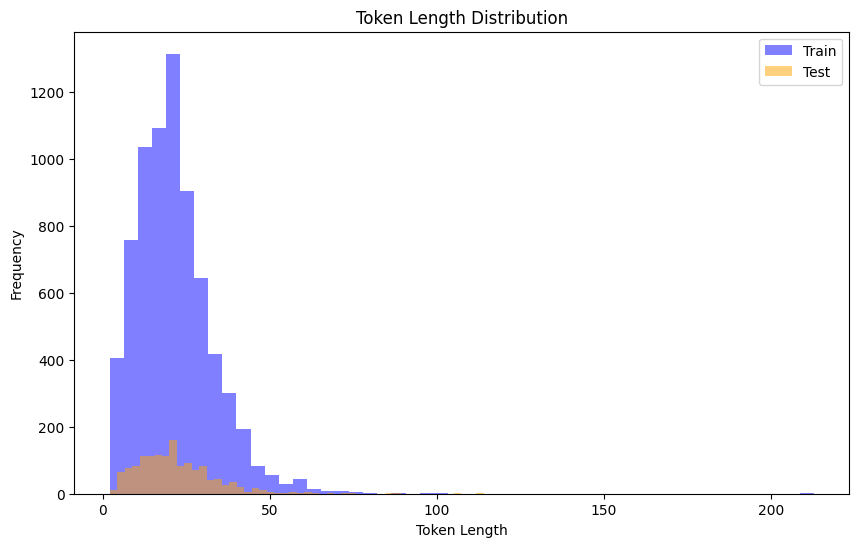

In [27]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [28]:
model = t.get_classifier()

In [29]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [30]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='auto')

In [31]:
history = learner.autofit(2e-5, 10, callbacks=[early_stopping])



begin training using triangular learning rate policy with max lr of 2e-05...
Epoch 1/10
915/915 [==============================] - 555s 576ms/step - loss: 1.2185 - accuracy: 0.5324 - val_loss: 0.8224 - val_accuracy: 0.6871
Epoch 2/10
915/915 [==============================] - 521s 569ms/step - loss: 0.6709 - accuracy: 0.7509 - val_loss: 0.7787 - val_accuracy: 0.7171
Epoch 3/10
915/915 [==============================] - 521s 569ms/step - loss: 0.4621 - accuracy: 0.8407 - val_loss: 0.8234 - val_accuracy: 0.7243
Epoch 4/10
915/915 [==============================] - 520s 569ms/step - loss: 0.3035 - accuracy: 0.9089 - val_loss: 0.8884 - val_accuracy: 0.7279
Epoch 5/10
915/915 [==============================] - 521s 570ms/step - loss: 0.2187 - accuracy: 0.9367 - val_loss: 1.0005 - val_accuracy: 0.7186
Epoch 6/10
915/915 [==============================] - 521s 570ms/step - loss: 0.1568 - accuracy: 0.9575 - val_loss: 1.0791 - val_accuracy: 0.7214
Epoch 7/10
915/915 [=========================

In [32]:
# Save the trained model
learner.save_model('/kaggle/output/bemoc.zip')

In [33]:
classes=t.get_classes()

In [34]:
cm = learner.validate(class_names=t.get_classes())

44/44 [==============================] - 12s 188ms/step
              precision    recall  f1-score   support

       anger       0.66      0.57      0.61       211
     disgust       0.57      0.63      0.60       271
        fear       0.86      0.79      0.82       192
         joy       0.84      0.86      0.85       305
     sadness       0.71      0.76      0.73       265
    surprise       0.76      0.69      0.72       156

    accuracy                           0.73      1400
   macro avg       0.73      0.72      0.72      1400
weighted avg       0.73      0.73      0.73      1400



In [35]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [36]:
!zip -r mental.zip /kaggle/output/mental-health-rand

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/mental-health-rand

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/mental-health-rand)


In [37]:
!ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [38]:
from IPython.display import FileLink
FileLink(r'/kaggle/working/mental-health-rand.zip')

/kaggle/working/mental-health-rand.zip

In [39]:
# Get predictions for the test data
preds = learner.predict(val)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(preds, axis=1)

# Get the list of class labels
class_labels = t.get_classes()

# Map predicted labels to class labels
predicted_labels = [class_labels[label] for label in predicted_labels]

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Text': X_test, 'True_Label': y_test, 'Predicted_Label': predicted_labels})

# Display the results DataFrame
print(results_df)

# Save the results to a CSV file
results_df.to_csv('classification_results.csv', index=False)

44/44 [==============================] - 8s 176ms/step
                                                   Text True_Label  \
0     বাইরে কেমন যেন একটা খসখস শব্দ হচ্ছে  তার মনে হ...       fear   
1     সোনা ও বিদেশি মুদ্রা উদ্ধারের মামলায় পুরান ঢা...    disgust   
2      সরকারি নিষেধাজ্ঞায় গত  মে থেকে টানা  দিনের জ...    sadness   
3     আমি তাকে সঙ্গে সঙ্গে চিনে ফেললাম কি আশ্চর্য কি...   surprise   
4     এবারের মিস ওয়ার্ল্ড বাংলাদেশ এই ভিডিওতে যা দে...    disgust   
...                                                 ...        ...   
1395  যেখানে ভিডিওটা বন্ধ হইসে  সিভিলের ওইদিক থেকে ত...       fear   
1396  গাজীপুরের শ্রীপুর উপজেলার নয়নপুর এলাকায় আজ ম...    sadness   
1397  নারীরা কোনো উদ্যোগ নিয়ে মাঠে নামতে চাইলে তাঁর...        joy   
1398  হঠাৎ লোকটা আমাকে কয়েকটি সাংকেতিক শব্দ বললো  আ...       fear   
1399   আবেশ আতঙ্ক এক ধরণের ভয় যা সময়ের সাথে বেড়ে চলে       fear   

     Predicted_Label  
0               fear  
1            disgust  
2            sadness  
3           

In [40]:
results_df["Predicted_Label"].value_counts()

Predicted_Label
joy         311
disgust     302
sadness     285
anger       183
fear        177
surprise    142
Name: count, dtype: int64

In [41]:
results_df["True_Label"].value_counts()

True_Label
joy         305
disgust     271
sadness     265
anger       211
fear        192
surprise    156
Name: count, dtype: int64

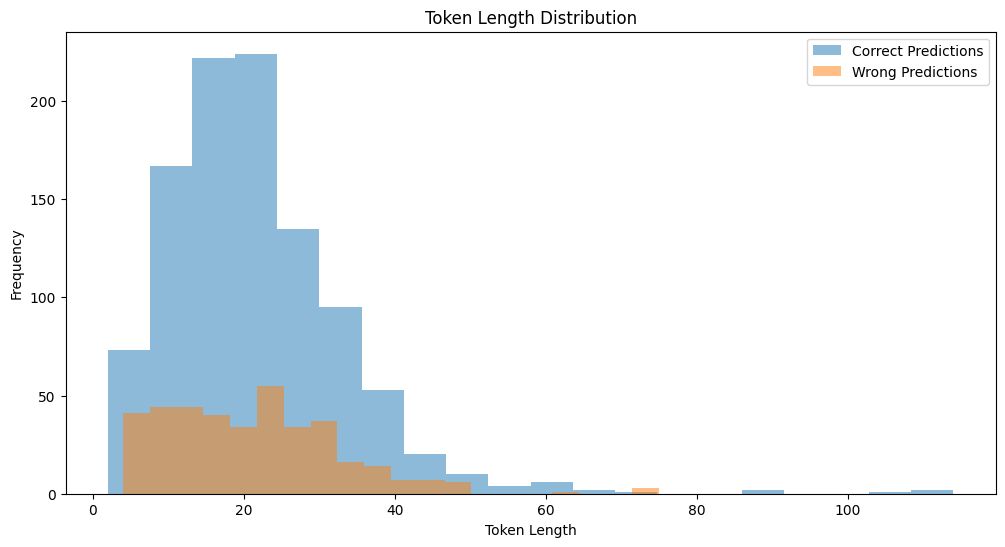

In [42]:
# Calculate token lengths for each description
results_df['Token_Length'] = results_df['Text'].apply(lambda x: len(x.split()))

# Separate data for correct and wrong predictions
correct_preds = results_df[results_df['True_Label'] == results_df['Predicted_Label']]
wrong_preds = results_df[results_df['True_Label'] != results_df['Predicted_Label']]

# Create histograms for token lengths
plt.figure(figsize=(12, 6))
plt.hist(correct_preds['Token_Length'], bins=20, alpha=0.5, label='Correct Predictions')
plt.hist(wrong_preds['Token_Length'], bins=20, alpha=0.5, label='Wrong Predictions')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [43]:
results_df.tail(25)

,Text,True_Label,Predicted_Label,Token_Length
1375,করোনা ভাইরাসের জন্য স্কুল বন্ধ করে দেওয়া হয়ে...,disgust,fear,24
1376,আমার কাছে মনে হচ্ছে পুরো পৃথিবী যেন থমকে আছে ...,fear,fear,16
1377,তার গা শিহরে উঠে ভয়ে দু কানের সামনে পিছনের ...,fear,fear,35
1378,এই মানুষটা পারে কাঁটাতারের দুপাশে থাকা মানুষগু...,joy,joy,13
1379,সত্যিই পরিচালকটা অনেক ব্রিলিয়েন্ট আর জি...,joy,joy,16
1380,পুরাই এপিক হাসতে হাসতে মরে গেলাম \nআমার তো...,joy,joy,22
1381,কক্সবাজারের কুতুবদিয়া উপজেলায় দুই স্কুলছাত্র...,anger,disgust,27
1382,এগুলো সব ধোন আর নুনু জাত,disgust,disgust,6
1383,পুকুর পাড়ে কে যেন মড়ার মত শুয়ে আছে কাছে গি...,fear,fear,17
1384,সব ঠিক আছে তুই মেয়ে ভাল স্ট্রং ক্যারেক্টার ...,joy,joy,14


In [44]:
def PlotGraph(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  x = range(1, len(acc) + 1)
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(x, acc, 'g', label='Training acc')
  plt.plot(x, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(x, loss, 'g', label='Training loss')
  plt.plot(x, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

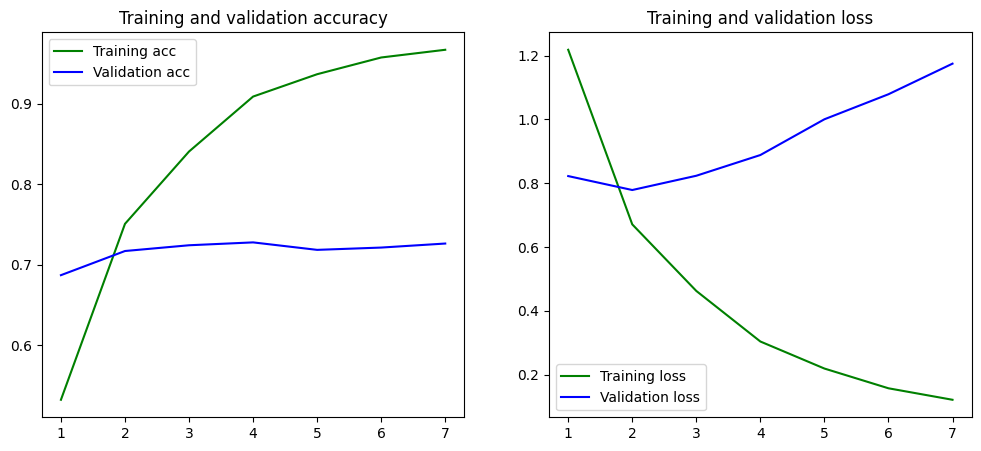

In [45]:
PlotGraph(history)

In [46]:
predictor=ktrain.get_predictor(learner.model, preproc=t)

In [47]:
predictor.predict(" I'm sorry about this post. It's gonna be a whole lot of hand wringing and mental masturbation. But I never seem to be able to process this in a meaningful way - and it makes attending NA and AA meetings a real pain. I don't seem to have the same kind of sickness that everyone else is describing - I'm having trouble relating to anyone at all there. I don't know what it's like for normal functional people, nor do I know what it's like for people who taste 1% beer and come to next month in jail after charging a rhino to a military convoy dressed in wehrmact univorm. Instead of this all-encompassing disease people speak of in groups it's like a slight poly-addiction as parts of the maladaptive patterns I've learned due to ADHD - and the cravings themselves are way lessened due to starting on strattera")

'disgust'

In [48]:
predictor.explain(" I'm sorry about this post. It's gonna be a whole lot of hand wringing and mental masturbation. But I never seem to be able to process this in a meaningful way - and it makes attending NA and AA meetings a real pain. I don't seem to have the same kind of sickness that everyone else is describing - I'm having trouble relating to anyone at all there. I don't know what it's like for normal functional people, nor do I know what it's like for people who taste 1% beer and come to next month in jail after charging a rhino to a military convoy dressed in wehrmact univorm. Instead of this all-encompassing disease people speak of in groups it's like a slight poly-addiction as parts of the maladaptive patterns I've learned due to ADHD - and the cravings themselves are way lessened due to starting on strattera ")

In [49]:
# Make predictions on the entire dataset
y_pred = predictor.predict(X_test)
